# **Importing library**

In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string,time
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer

ModuleNotFoundError: No module named 'bs4'

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# **Start Reading Dataset & Data Cleaning**

In [ ]:
df = pd.read_csv('/content/Fraud_Message.csv', encoding='latin1')

In [ ]:
df

,target,text
0,not fraud,"Go until jurong point, crazy.. Available only ..."
1,not fraud,Ok lar... Joking wif u oni...
2,fraud,Free entry in 2 a wkly comp to win FA Cup fina...
3,not fraud,U dun say so early hor... U c already then say...
4,not fraud,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,fraud,This is the 2nd time we have tried 2 contact u...
5568,not fraud,Will Ã_ b going to esplanade fr home?
5569,not fraud,"Pity, * was in mood for that. So...any other s..."
5570,not fraud,The guy did some bitching but I acted like i'd...


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df = df.drop_duplicates(subset=['text'])

In [ ]:
df.duplicated(subset=['text']).sum()

0

In [ ]:
df.shape


(5169, 2)

In [ ]:
df['target'].value_counts()

not fraud    4516
fraud         653
Name: target, dtype: int64

In [ ]:
# converting this ham as 0 and spam as 1

df['target'] = df['target'].replace(['not fraud','fraud'],[0,1])
df['target'].value_counts()


<ipython-input-23-f076dbf79a7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].replace(['not fraud','fraud'],[0,1])


0    4516
1     653
Name: target, dtype: int64

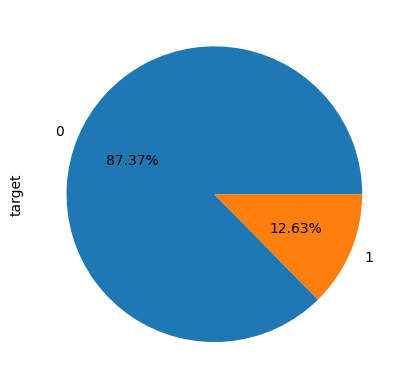

In [ ]:
df['target'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

In [ ]:
df['Num_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-25-add68f065328>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [ ]:
df['Num_Characters'] = df['text'].apply(len)

<ipython-input-26-aa43028f3be9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_Characters'] = df['text'].apply(len)


In [ ]:
df['Num_of_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-27-fe785e2eb0a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_of_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [ ]:
df

,target,text,Num_of_words,Num_Characters,Num_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2
1,0,Ok lar... Joking wif u oni...,8,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2
3,0,U dun say so early hor... U c already then say...,13,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,163,4
5568,0,Will Ã_ b going to esplanade fr home?,9,38,1
5569,0,"Pity, * was in mood for that. So...any other s...",15,57,2
5570,0,The guy did some bitching but I acted like i'd...,27,125,1


In [ ]:
df['text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [ ]:
df[df['target'] == 1][['Num_Characters','Num_of_words','Num_of_sentence']].describe()

,Num_Characters,Num_of_words,Num_of_sentence
count,653.000000,653.000000,653.000000
mean,138.738132,27.675345,2.978560
std,30.418104,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,226.000000,46.000000,9.000000


In [ ]:
df[df['target'] == 0][['Num_Characters','Num_of_words','Num_of_sentence']].describe()

,Num_Characters,Num_of_words,Num_of_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.575952,17.123782,1.820195
std,56.396321,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<ipython-input-32-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

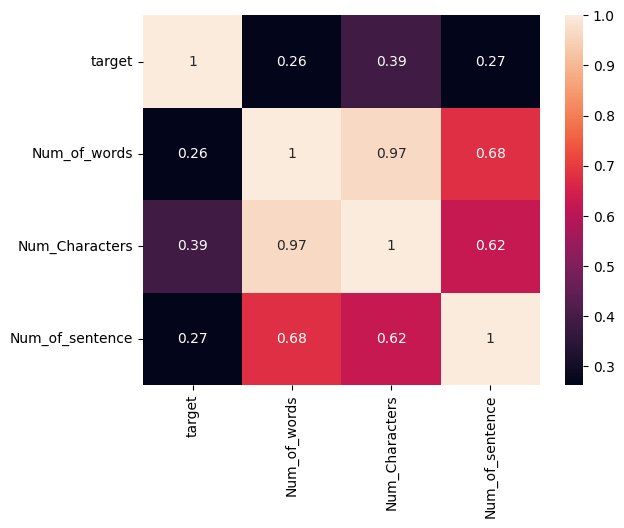

In [ ]:
sns.heatmap(df.corr(),annot=True)

# **Text preprocessing**

Now we apply some Text preprocessing on text column for better result

* Lowercasing
* Removing Stopwords
* Removing Special Character
* Removing HTML tags
* Tokenization
* Lemmatization or Stemming
* Removing urls

In [ ]:
df

,target,text,Num_of_words,Num_Characters,Num_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2
1,0,Ok lar... Joking wif u oni...,8,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2
3,0,U dun say so early hor... U c already then say...,13,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,163,4
5568,0,Will Ã_ b going to esplanade fr home?,9,38,1
5569,0,"Pity, * was in mood for that. So...any other s...",15,57,2
5570,0,The guy did some bitching but I acted like i'd...,27,125,1


In [ ]:
stop_words = set(stopwords.words('english'))


# Function for text preprocessing
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if not word in stopwords.words('english')]
    # Join tokens to form processed text
    processed_text = ' '.join(tokens)
    return processed_text

# Assuming df is your DataFrame and 'text' is the column containing text
df['processed_text'] = df['text'].apply(preprocess_text)


<ipython-input-34-0cd24c1d7bd5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text'] = df['text'].apply(preprocess_text)


In [ ]:
df

,target,text,Num_of_words,Num_Characters,Num_of_sentence,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,8,29,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,13,49,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah dont think go usf life around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,163,4,2nd time tried 2 contact u u ãâ750 pound prize...
5568,0,Will Ã_ b going to esplanade fr home?,9,38,1,ã_ b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",15,57,2,pity mood soany suggestion
5570,0,The guy did some bitching but I acted like i'd...,27,125,1,guy bitching acted like id interested buying s...


In [ ]:
df.isnull().sum()

target             0
text               0
Num_of_words       0
Num_Characters     0
Num_of_sentence    0
processed_text     0
dtype: int64

In [ ]:
# Create a corpus list
corpus = df['processed_text'].tolist()

In [ ]:
corpus[4525]

'either way work ltgt year old hope doesnt bother'

In [ ]:
# prompt: how to check the length of character in sentence in  corpus

print(len(corpus[4525]))


48


# **Word Cloud**

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width= 900,height=900, min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target']==1]['processed_text'].str.cat(sep=" "))

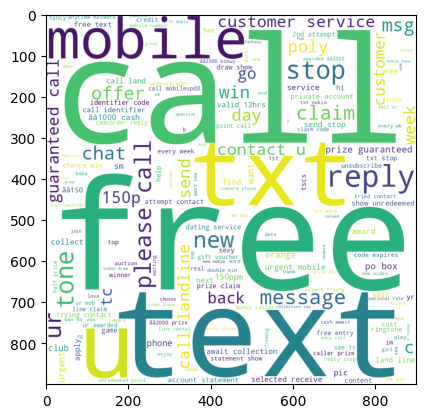

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target']==0]['processed_text'].str.cat(sep=" "))

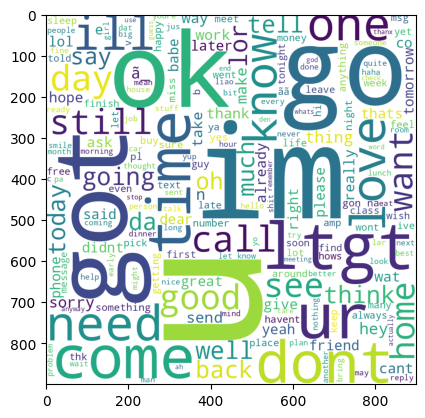

In [ ]:
plt.imshow(ham_wc)

In [ ]:
# prompt: count the corpus size

corpus_count = len(corpus)


In [ ]:
df

,target,text,Num_of_words,Num_Characters,Num_of_sentence,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,8,29,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,13,49,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah dont think go usf life around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,163,4,2nd time tried 2 contact u u ãâ750 pound prize...
5568,0,Will Ã_ b going to esplanade fr home?,9,38,1,ã_ b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",15,57,2,pity mood soany suggestion
5570,0,The guy did some bitching but I acted like i'd...,27,125,1,guy bitching acted like id interested buying s...


# **Most Frequent Words in Spam & ham message**

In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['processed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

10791

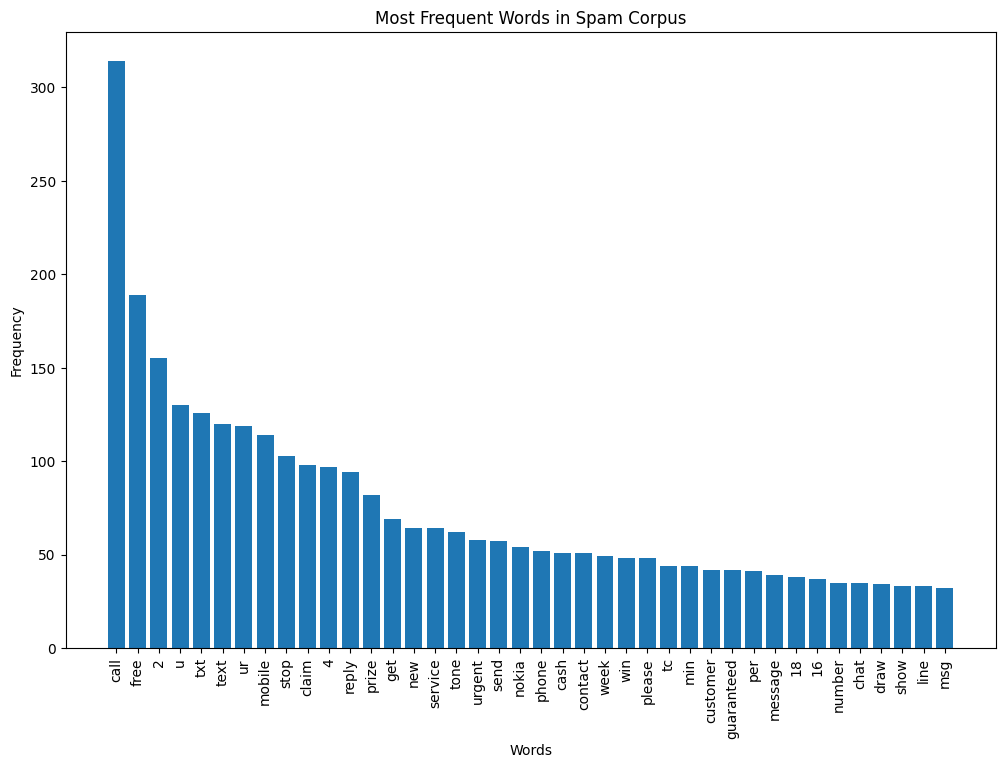

In [ ]:
# plot the most frequent word in spam corpus with words name in Xaxis  name of words

from collections import Counter
spam_words_freq = Counter(spam_corpus)

most_freq_spam = spam_words_freq.most_common(40)
plt.figure(figsize=(12, 8))
plt.bar(x= [word for word,count in most_freq_spam], height=[count for word,count in most_freq_spam])

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Frequent Words in Spam Corpus')
plt.xticks(rotation=90)

plt.show()


In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['processed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

37027

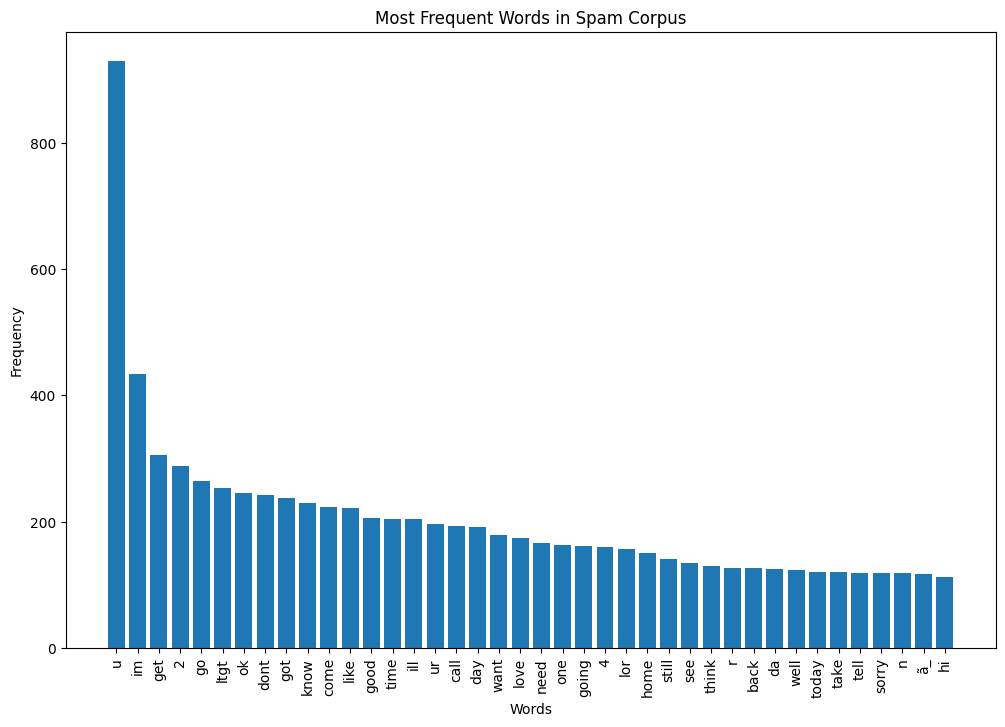

In [ ]:
from collections import Counter
ham_words_freq = Counter(ham_corpus)

most_freq_ham = ham_words_freq.most_common(40)
plt.figure(figsize=(12, 8))
plt.bar(x= [word for word,count in most_freq_ham], height=[count for word,count in most_freq_ham])

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Frequent Words in Spam Corpus')
plt.xticks(rotation=90)

plt.show()

# **Text Vectorisation Using TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['processed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y = df['target'].values

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49 )

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4135, 3000), (1034, 3000), (4135,), (1034,))

# **Model Building**

In [ ]:
#class_weight = dict({0:1,1:4})

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score
from sklearn.model_selection import GridSearchCV

In [ ]:
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[899   0]
 [ 30 105]]
0.9709864603481625
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       899
           1       1.00      0.78      0.88       135

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



# **Testing The Accuracy & Precision Score For All Algorithm**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=100, random_state=20)
abc = AdaBoostClassifier(n_estimators=80, random_state=42)
bc = BaggingClassifier(n_estimators=50, random_state=32)
etc = ExtraTreesClassifier(n_estimators=50, random_state=12)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=22)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'Support Vector Classifier' : svc,
    'K-Nearest Neighbors Classifier' : knc,
    'Multinomial Naive Bayes Classifier': mnb,
    'Decision Tree Classifier': dtc,
    'Logistic Regression Classifier': lrc,
    'Random Forest Classifier': rfc,
    'AdaBoost Classifier ': abc,
    'Bagging Classifier': bc,
    'Extra Trees Classifier': etc,
    'Gradient Boosting Decision Tree Classifier':gbdt,
    ' XGBoost Classifier':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.971953578336557, 0.9732142857142857)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  Support Vector Classifier
Accuracy -  0.971953578336557
Precision -  0.9732142857142857
For  K-Nearest Neighbors Classifier
Accuracy -  0.9052224371373307
Precision -  1.0
For  Multinomial Naive Bayes Classifier
Accuracy -  0.9748549323017408
Precision -  1.0
For  Decision Tree Classifier
Accuracy -  0.9410058027079303
Precision -  0.8936170212765957
For  Logistic Regression Classifier
Accuracy -  0.9468085106382979
Precision -  0.925531914893617
For  Random Forest Classifier
Accuracy -  0.9709864603481625
Precision -  1.0
For  AdaBoost Classifier 
Accuracy -  0.9661508704061895
Precision -  0.923728813559322
For  Bagging Classifier
Accuracy -  0.960348162475822
Precision -  0.8852459016393442
For  Extra Trees Classifier
Accuracy -  0.9758220502901354
Precision -  0.9910714285714286
For  Gradient Boosting Decision Tree Classifier
Accuracy -  0.9545454545454546
Precision -  0.9583333333333334
For   XGBoost Classifier
Accuracy -  0.9671179883945842
Precision -  0.9719626168224299


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,K-Nearest Neighbors Classifier,0.905222,1.000000
2,Multinomial Naive Bayes Classifier,0.974855,1.000000
5,Random Forest Classifier,0.970986,1.000000
8,Extra Trees Classifier,0.975822,0.991071
0,Support Vector Classifier,0.971954,0.973214
10,XGBoost Classifier,0.967118,0.971963
9,Gradient Boosting Decision Tree Classifier,0.954545,0.958333
4,Logistic Regression Classifier,0.946809,0.925532
6,AdaBoost Classifier,0.966151,0.923729
3,Decision Tree Classifier,0.941006,0.893617


# **Saving The Model In Pickle File**

In [ ]:
import pickle
pickle.dump(tfidf,open('TFIDF_vectorizer.pkl','wb'))
pickle.dump(mnb,open('model_built.pkl','wb'))